In [1]:
import tensorflow as tf


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
import urllib.request

url = "https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv"
filename = "moore.csv"

urllib.request.urlretrieve(url, filename)
print("Download complete!")


Download complete!


In [7]:
#loading the data
data = pd.read_csv('moore.csv',header=None).to_numpy()

In [9]:
data  

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [12]:
X= data[:,0].reshape(-1,1) #reshape(-1,1) is used to convert 1d array to 2d array making a N*D matrix
Y = data[:,1] 

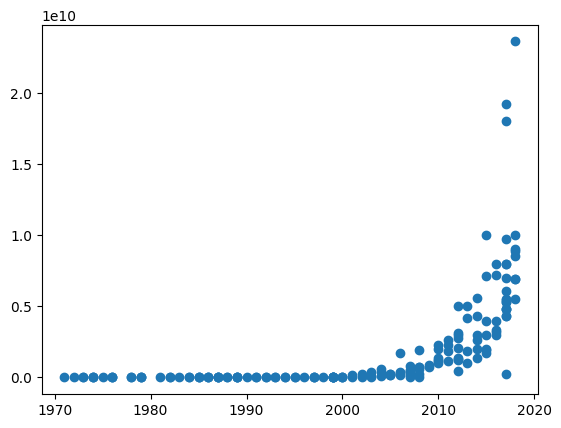

In [13]:
#plot the data 
plt.scatter(X,Y)

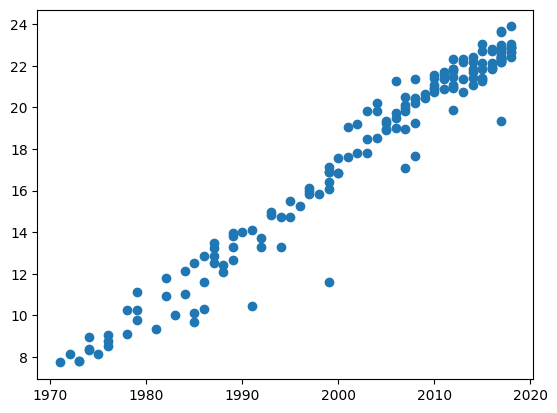

In [14]:
Y = np.log(Y) #logarithmic transformation of Y which means that 
plt.scatter(X,Y)


In [15]:
X = X - X.mean() #centering the data 

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

In [ ]:

model.compile(
    optimizer = tf.keras.optimizers.SGD(0.001,0.9),
    loss = 'mse'
)

In [19]:
def scedule(epoch,lr):
    if epoch >= 50:
        return 0.0001
    else:
        return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(scedule)

In [20]:
r = model.fit(X,Y,epochs=200,callbacks=[scheduler])

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 638.1706 - learning_rate: 0.0010
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 579.8588 - learning_rate: 0.0010
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 308.5581 - learning_rate: 0.0010
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 221.4768 - learning_rate: 0.0010
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 149.9695 - learning_rate: 0.0010
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 173.3273 - learning_rate: 0.0010
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 92.7459 - learning_rate: 0.0010
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 62.1851 - learning_rate: 0.0010
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 47.9051 - learning_rate: 0.0010
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 38.1993 - learning_rate: 0.0010
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 24.3137 - learning_rate: 0.0010
Epoch 12/200

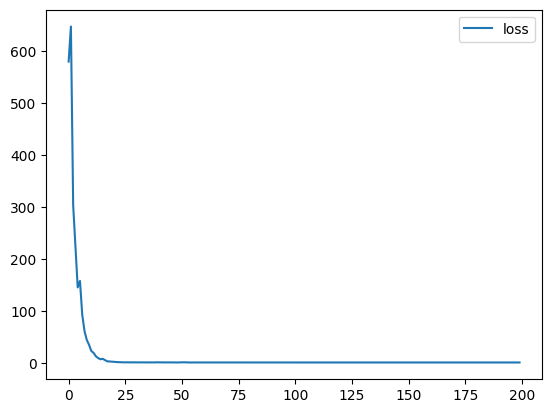

In [23]:
#plot the loss
plt.plot(r.history['loss'],label ='loss')
plt.legend()


In [24]:
model.layers

[<Dense name=dense, built=True>]

In [25]:
model.layers[0].get_weights()

[array([[0.34349403]], dtype=float32), array([17.77332], dtype=float32)]

In [26]:
a=model.layers[0].get_weights()[0][0,0]

In [27]:
a

0.34349403

In [28]:
print("time to double every year:", np.log(2)/a)

time to double every year: 2.017930806228039


In [31]:
X = X.flatten()
denominator = X.dot(X) - X.mean() * X.sum()
a=(X.dot(Y) - Y.mean () *X.sum() ) / denominator
b= (Y.mean () * X.dot(X)-X.mean() * X.dot(Y))/denominator
print(a,b)


0.341682487387313 17.764939393631764


In [32]:
print("time to double :", np.log(2)/a)

time to double : 2.0286295205239204
